<font color='blue'><p>
## 데이터시각화 문제와 풀이
`Demo.csv`와 `구매내역정보.csv` 데이터를 이용하여 주어진 시각화 문제를 해결하시오. 

*Imports*

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

# 한글 폰트 설정
import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

import warnings
warnings.filterwarnings("ignore")

*Read Data*

In [2]:
cs = pd.read_csv('Demo.csv', encoding='cp949')
tr = pd.read_csv('구매내역정보.csv', encoding='cp949', engine='python')

*Transform Data*

In [3]:
tr.상품중분류명.unique()

array(['여성용의류-정장류', '농산물', '음료', '남성용의류-캐주얼', '여성용의류-SPA', '주방가전',
       'TV/AV', '남성용의류-정장류', '가공식품', '휴대폰/태블릿', '생활가전', '골프용품/의류',
       '스포츠용품/의류', '화장품', '아동용의류', '주방용품', 'PC/노트북/프린터/카메라', '가구', '구두',
       '패션잡화', '침구류', '생활용품', '컴퓨터주변기기', '수산물', '축산물', '여성용의류-고급의류', '명품',
       '건강식품', '여성용의류-이너웨어', '여성용의류-캐주얼', '주얼리'], dtype=object)

In [4]:
def gf(x):
    if x in ['여성용의류-정장류', '여성용의류-SPA', '여성용의류-고급의류', '여성용의류-이너웨어', '여성용의류-캐주얼']:
        return '여성의류'
    elif x in ['남성용의류-캐주얼', '남성용의류-정장류']:
        return '남성의류'
    else:
        return x
    
tr.상품중분류명.apply(gf)    

0             여성의류
1              농산물
2              농산물
3              농산물
4              농산물
            ...   
101687     휴대폰/태블릿
101688     휴대폰/태블릿
101689    스포츠용품/의류
101690       TV/AV
101691        남성의류
Name: 상품중분류명, Length: 101692, dtype: object

In [5]:
cs.성별 = cs.성별.map({1: '남', 2: '여'})

cs['거주지역_광역'] = cs.거주지역.apply(lambda x: x.split()[0])
cs['거주지역_기초'] = cs.거주지역.apply(lambda x: x.split()[1])

tr['구매지역_광역'] = tr.구매지역.apply(lambda x: x.split()[0])
tr['구매지역_기초'] = tr.구매지역.apply(lambda x: x.split()[1])

In [6]:
md = pd.merge(cs, tr, on='ID')
md.head()

,ID,성별,연령,거주지역,거주지역_광역,거주지역_기초,상품대분류명,상품중분류명,구매지역,구매일자,구매시간,구매수량,구매금액,취소여부,구매지역_광역,구매지역_기초
0,478207946,남,84,서울 성동구,서울,성동구,가전제품,컴퓨터주변기기,서울 동대문구,20141219,13,1,59000,0,서울,동대문구
1,478207946,남,84,서울 성동구,서울,성동구,가전제품,TV/AV,서울 동대문구,20141031,14,1,106000,0,서울,동대문구
2,478207946,남,84,서울 성동구,서울,성동구,가전제품,주방가전,서울 중구,20140815,15,1,37000,0,서울,중구
3,478207946,남,84,서울 성동구,서울,성동구,의류잡화,여성용의류-이너웨어,서울 동대문구,20140322,17,1,118000,0,서울,동대문구
4,479806984,남,84,서울 서초구,서울,서초구,생활잡화,화장품,서울 중구,20140704,12,1,22000,0,서울,중구


<br><p>
**[연습문제 42]** 각 고객의 총구매건수를 구한 후 Histogram을 출력하시오. 단, bin의 크기는 30로 설정.

In [7]:
# 총구매건수
df = md.groupby('ID').size()
df

ID
741463        7
909249       29
1065068      11
1310410       2
1387032       6
             ..
998623524    19
999024423     3
999184958    26
999375162    50
999494396     4
Length: 3542, dtype: int64

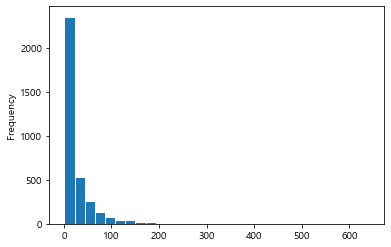

In [8]:
# pandas
df.plot.hist(bins=30, edgecolor='w')
plt.show()

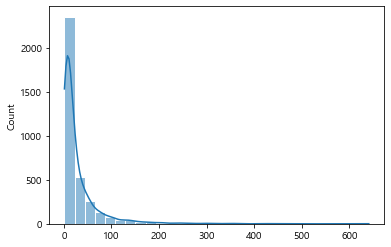

In [9]:
# seaborn
sns.histplot(df, bins=30, edgecolor='w', kde=True)
plt.show()

**[연습문제 43]** 남녀별 시간대별 구매수량을 Bar Chart로 도식하시오.

In [10]:
# pandas
df = pd.pivot_table(md, index='구매시간', columns='성별', values='구매금액', aggfunc=np.mean, fill_value=0)
df

성별,남,여
구매시간,,
1,198000.000000,4200.000000
2,0.000000,123000.000000
3,0.000000,14000.000000
4,0.000000,17400.000000
6,0.000000,47333.333333
7,0.000000,18500.000000
9,326444.444444,176863.636364
10,197941.908714,159409.990575
11,97921.182266,106026.017345


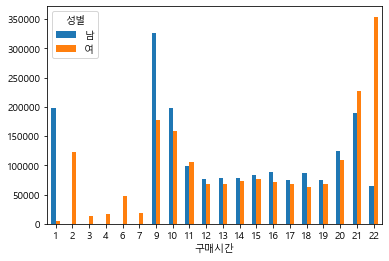

In [11]:
df.plot(kind='bar', rot=0, stacked = False)
plt.show()

,구매시간,성별,value
0,1,남,198000.000000
1,2,남,0.000000
2,3,남,0.000000
3,4,남,0.000000
4,6,남,0.000000
5,7,남,0.000000
6,9,남,326444.444444
7,10,남,197941.908714
8,11,남,97921.182266
9,12,남,76046.329294


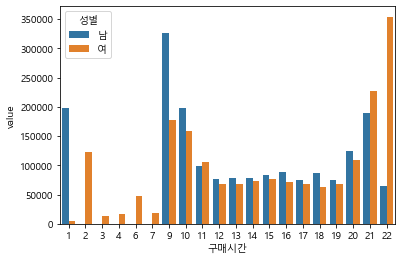

In [12]:
# seaborn

# First, you have to unpivot a DataFrame from wide to long format
df_sns = pd.melt(df.reset_index(), id_vars=["구매시간"], value_vars=["남", "여"])
display(df_sns) 

sns.barplot(data=df_sns, x='구매시간', y='value', hue='성별')
plt.show()

**[연습문제 44]** 상품별(중분류) 성별 구매수량 계산하여, 아래 그림과 같은 subplot이 적용된 Chart를 출력하시오.
<img src="http://drive.google.com/uc?export=view&id=17EVX3rhzeCjwA7AfeeOee0VsiE2uU1gx" style="width: 60%">

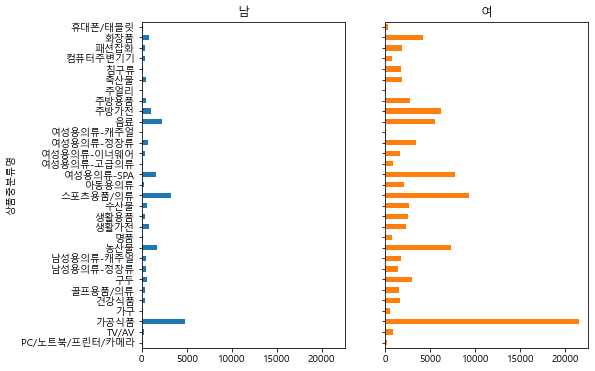

In [13]:
# pandas
df = pd.pivot_table(md, index='상품중분류명', columns='성별', values='구매수량', aggfunc=sum, fill_value=0)
#df.index.name = None
df.plot(kind='barh', figsize=(8,6), subplots=True, layout=(1, 2), sharey=True, legend=False)
plt.show()

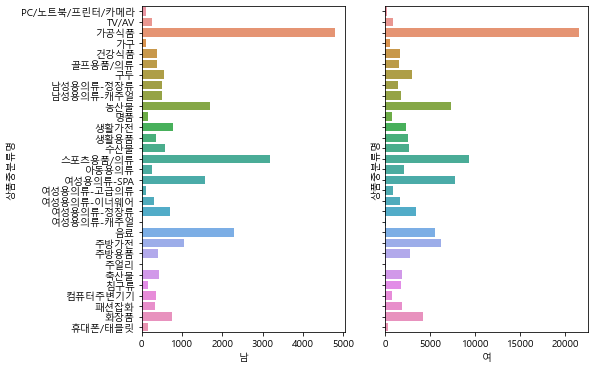

In [14]:
# seaborn

f, axes = plt.subplots(1, 2, figsize=(8, 6), sharey=True)
sns.barplot(data=df.reset_index(), y='상품중분류명', x='남', ax=axes[0])
sns.barplot(data=df.reset_index(), y='상품중분류명', x='여', ax=axes[1])
plt.show()

**[연습문제 45]** 서울시에 거주하는 실버고객의 지역별(구별) 분포를 Pie Chart로 시각화하시오. 

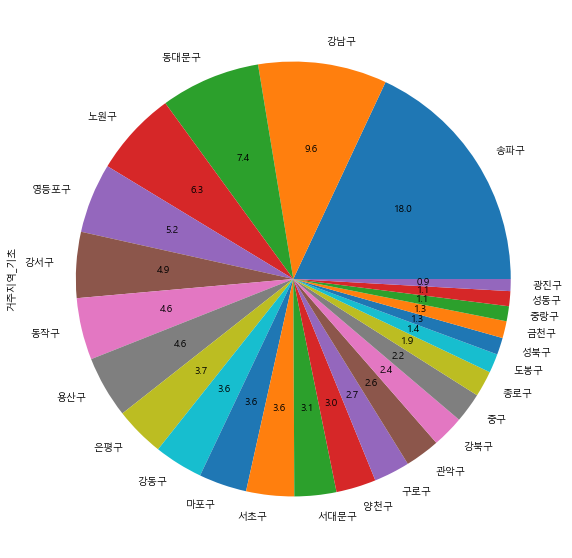

In [15]:
cs.query('거주지역_광역 == "서울"').거주지역_기초.value_counts().plot.pie(figsize=(10, 10), autopct='%.1f')
plt.show()

**[연습문제 46]** 아래와 같은 Heatmap를 도식하시오.
<img src="http://drive.google.com/uc?export=view&id=1o6uV3uil2smAVIvXDGEbB4IWhyqIlDoi" style="width: 60%">

In [16]:
# seaborn
df = pd.pivot_table(md, index='상품중분류명', columns='구매시간', values='구매금액', aggfunc=np.sum, fill_value=0)
df

구매시간,1,2,3,4,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22
상품중분류명,,,,,,,,,,,,,,,,,,,,
PC/노트북/프린터/카메라,0,0,0,0,0,0,0,10942000,15179000,7409000,11513000,22675000,14555000,21476000,15329000,14725000,15256000,10754000,6411000,43000
TV/AV,0,0,0,0,0,0,3049000,61173000,75217000,48229000,45471000,45285000,56593000,68854000,65820000,59004000,68817000,67502000,14066000,2569000
가공식품,0,0,0,0,0,0,45000,1648000,7332000,23756000,34629000,30915000,20563000,23130000,20346000,21235000,22298000,10690000,1751000,41000
가구,0,0,0,0,0,0,0,33787000,46810000,20352000,6345000,12228000,8529000,6082000,2789000,14987000,7944000,3209000,87000,0
건강식품,0,0,0,0,0,0,0,2541000,5178000,6410000,8360000,15544000,11786000,11880000,7394000,6974000,2566000,1417000,8000,0
골프용품/의류,0,0,0,0,0,0,184000,9387000,12655000,14685000,43854000,60008000,40357000,61574000,44135000,13336000,7578000,6308000,189000,0
구두,0,0,0,0,0,0,0,2476000,12552000,24781000,29628000,51775000,49934000,55262000,36120000,29136000,22483000,7000000,975000,452000
남성용의류-정장류,0,0,0,0,0,0,45000,1330000,12544000,25041000,20100000,28247000,35786000,38276000,27786000,28731000,18545000,4962000,89000,0
남성용의류-캐주얼,0,123000,0,0,0,0,0,4572000,16937000,33525000,39216000,54762000,64428000,51983000,42519000,35890000,32489000,8475000,492000,50000


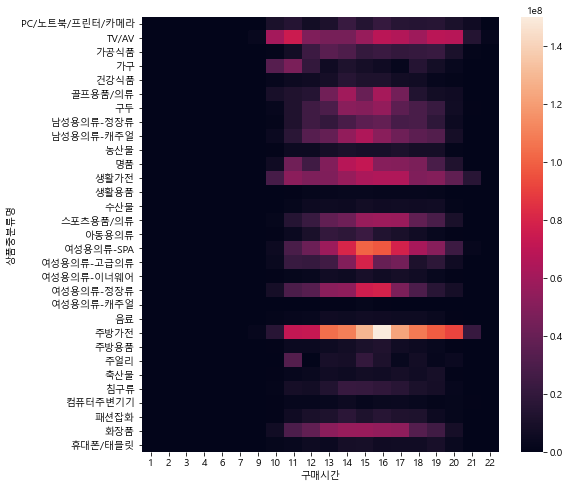

In [17]:
plt.figure(figsize=(8,8))
sns.heatmap(df)
plt.show()

<font color='blue'><p>
## End